## Análisis de Títulos de Videos de YouTube:

Este notebook analiza los títulos de videos de YouTube utilizando técnicas de procesamiento de lenguaje natural (NLP), incluyendo TF-IDF y similitud coseno.

## Objetivos:
Cargar y limpiar datos de videos de YouTube.
Aplicar TF-IDF para representar los títulos de los videos.
Calcular la similitud entre títulos para identificar tendencias.
Visualizar patrones con gráficos.

## Importación de Librerías
Se utilizan bibliotecas populares de **ciencia de datos** y **procesamiento de texto**, incluyendo:
- `pandas`: Para manipulación de datos.
- `numpy`: Para cálculos numéricos.
- `matplotlib` y `seaborn`: Para visualización.
- `sklearn.feature_extraction.text`: Para **vectorización TF-IDF**.
- `sklearn.metrics.pairwise`: Para **similitud coseno**.

## Carga y Preprocesamiento de Datos
Se cargan los datos desde un archivo CSV que contiene información sobre videos de YouTube. El título de cada video es extraído y normalizado para evitar problemas con caracteres especiales.

## Aplicación de TF-IDF
TF-IDF (**Term Frequency - Inverse Document Frequency**) es una técnica que permite evaluar la importancia de palabras en un conjunto de textos.

Se utiliza aquí para convertir los títulos en vectores numéricos que pueden ser comparados.

## Cálculo de Similitud entre Títulos
Se usa la métrica de **cosine similarity** para encontrar títulos de videos similares, lo que puede ayudar a identificar tendencias y patrones en los contenidos más populares.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.font_manager as fm
import unicodedata

In [265]:
# Normalización de texto para evitar caracteres especiales mal codificados
def normalize_text(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', str(text)) if unicodedata.category(c) != 'Mn')

# Cargar el dataset de YouTube con manejo de errores de codificación correcto
data = pd.read_csv("../Data/MXvideos.csv", encoding='latin1')

# Verificar las primeras filas
print(data.head())

# Extraer la columna 'title'
titles = data['title'].astype(str)

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                           

In [266]:
def get_similar_videos(query, top_n=10):
    """Encuentra los videos más similares a una consulta usando TF-IDF y similitud de coseno."""
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, X).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]

    return data.iloc[top_indices][['title', 'channel_title', 'views']]

# Ejemplo de uso
query_video = "Best music hits 2024"
print(get_similar_videos(query_video))

                                                   title      channel_title  \
4931   The Best Of YIRUMA | Yiruma's Greatest Hits ~ ...  Best Instrumental   
11884  TOP SONGS 2018 - Best English Song 2018 Hits -...         Love Songs   
10747  New Kygo Mix 2018 #1 | Best Of Tropical House ...             GITRON   
37186  Kenny G Greatest Hits Full Album 2018 | The Be...  Best Instrumental   
27559  Kenny G Greatest Hits Full Album 2018 | The Be...         I Love OPM   
25022  Kenny G Greatest Hits Full Album 2018 | The Be...      Miracle Music   
23974  The Best Of YIRUMA  Yiruma's Greatest Hits || ...           Mao Tran   
23749  The Best Of YIRUMA  Yiruma's Greatest Hits || ...           Mao Tran   
24886  The Best Of YIRUMA  Yiruma's Greatest Hits || ...           Mao Tran   
11271  Midnight Piano Music 2018 - Moonlit Night - De...     Music Relaxing   

        views  
4931    43447  
11884   86796  
10747   60246  
37186  113497  
27559  389443  
25022  179105  
23974  812681  
23

In [267]:
# Configurar estilo de gráficos y evitar problemas con emojis
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False

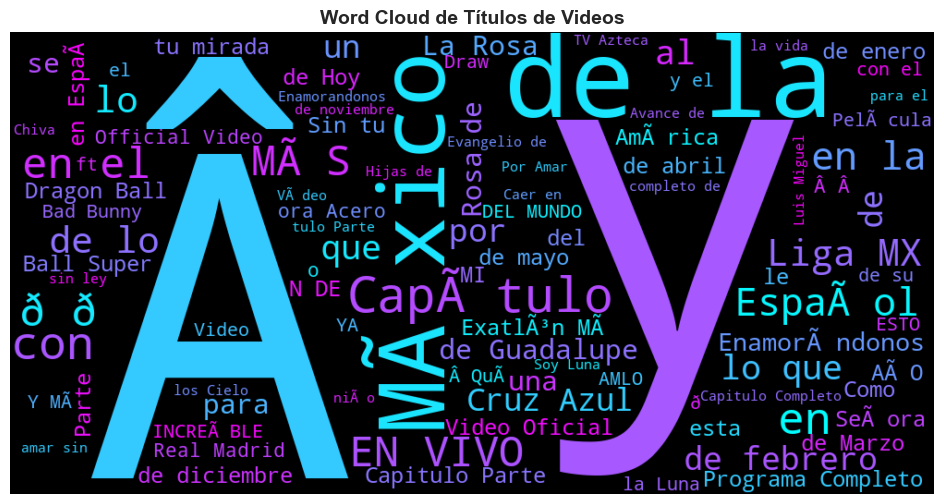

In [268]:
# Generar una nube de palabras de los títulos de los videos
wordcloud_text = ' '.join(titles)
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='cool', max_words=100).generate(wordcloud_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud de Títulos de Videos", fontsize=14, fontweight='bold')
plt.show()

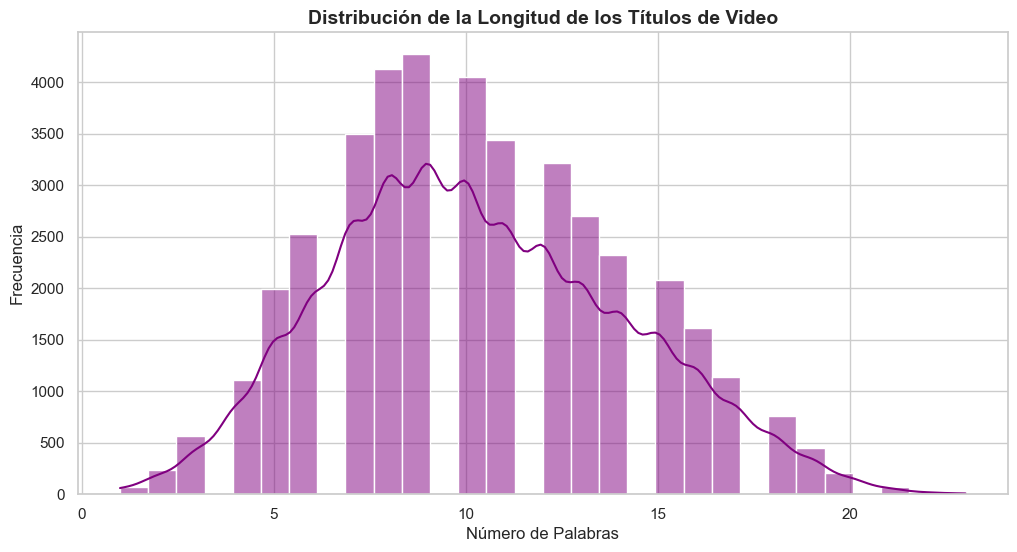

In [269]:
# Análisis de la distribución de la longitud de los títulos
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data['title_length'], bins=30, kde=True, color='purple')
plt.title("Distribución de la Longitud de los Títulos de Video", fontsize=14, fontweight='bold')
plt.xlabel("Número de Palabras")
plt.ylabel("Frecuencia")
plt.show()

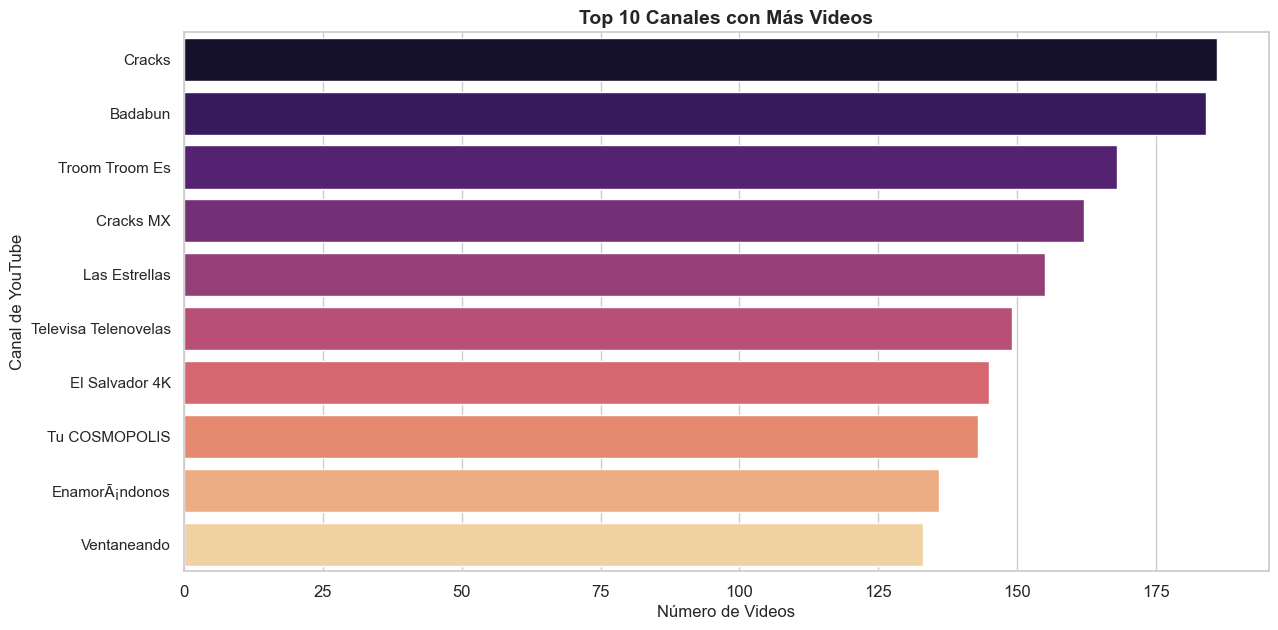

In [270]:
# Gráfica de los 10 canales con más videos
top_channels = data['channel_title'].value_counts().head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='magma', hue=top_channels.index, dodge=False)
plt.xticks(fontsize=12)
plt.title("Top 10 Canales con Más Videos", fontsize=14, fontweight='bold')
plt.xlabel("Número de Videos", fontsize=12)
plt.ylabel("Canal de YouTube", fontsize=12)
plt.legend([], [], frameon=False)
plt.show()

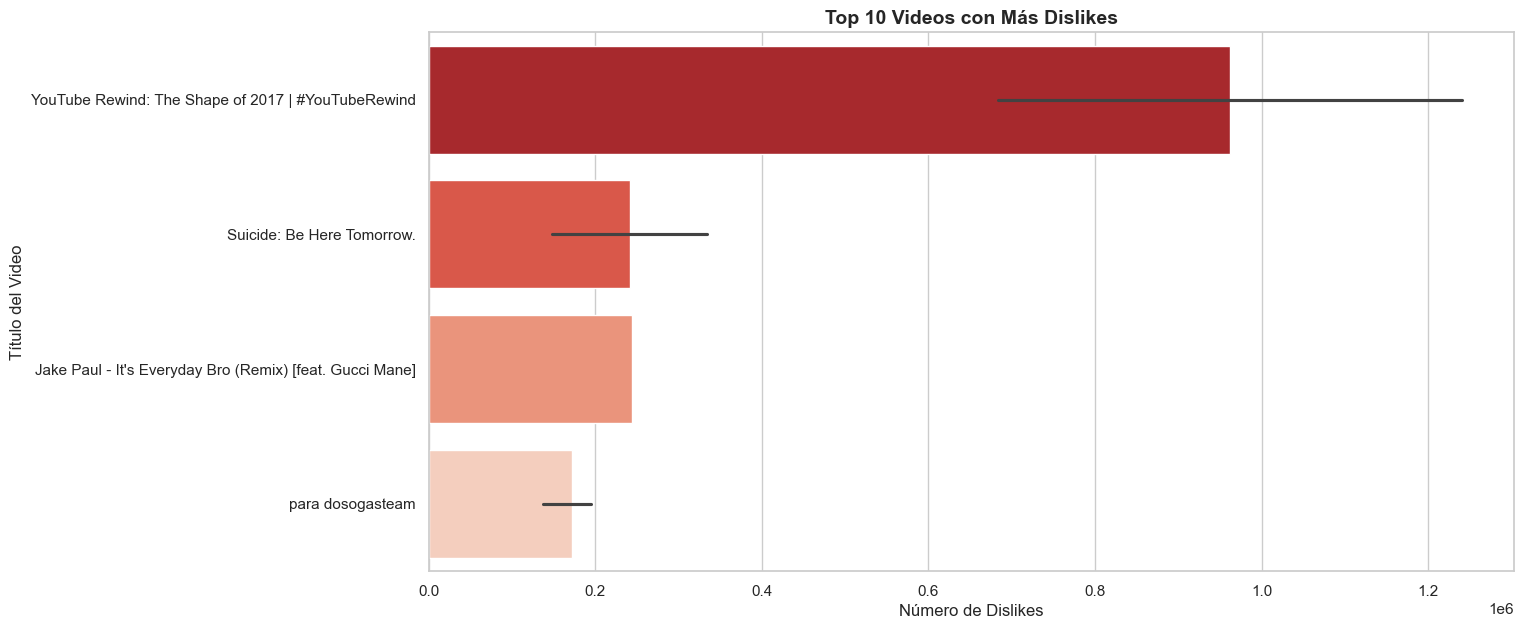

In [271]:
# Gráfica de los videos con más dislikes
if 'dislikes' in data.columns:
    top_disliked_videos = data[['title', 'dislikes']].sort_values(by='dislikes', ascending=False).head(10)
    plt.figure(figsize=(14, 7))
    sns.barplot(x=top_disliked_videos['dislikes'], y=top_disliked_videos['title'], palette='Reds_r', hue=top_disliked_videos['title'], legend=False)
    plt.title("Top 10 Videos con Más Dislikes", fontsize=14, fontweight='bold')
    plt.xlabel("Número de Dislikes", fontsize=12)
    plt.ylabel("Título del Video", fontsize=12)
    plt.show()
else:
    print("La columna 'dislikes' no está en el dataset.")